# 1 - Introduction to Acoustic Problem

# 1.1 - Introduction

This notebook brings the description of the acoustic wave equation, which we also refer as the *acoustic problem*, 
including the discretization by finite differences and the setup for the tests we employ.

# 1.2 - The acoustic problem

Let $D=\Omega \times I\subset\mathbb{R}^{3}$ be the domain of the problem to be studied, where $\Omega=\left[x_{I},x_{F}\right] \times\left[z_{I},z_{F}\right]$ is the spatial domain $D$ and $I=\left[0,t_{F}\right]$ is the time interval of the integration. As usual, $\partial\Omega$ denotes the boundary of $\Omega$, 
represented bellow.

<img src='domain1.png' width=500>

The spatial variables are $x$ and $z$ (which represents depth) and  $t$ denotes time. The function $u(x,z,t):D\rightarrow \mathbb{R}$  represents the displacament of the acoustic wave, obeying the following equation:

\begin{equation}
u_{tt}(x,z,t)-c^2(x,z)\Delta(u(x,z,t))=c^2(x,z)f(x,z,t).
\end{equation}

where $f(x,z,t):D\rightarrow \mathbb{R}$ denotes external forcing and $c(x,z):\Omega\rightarrow \mathbb{R}$ is the speed of propagation of the wave. The initial conditions are given by:

\begin{equation}
u(x,z,0) = 0.0 \hspace{.5cm} \mbox{ and } \hspace{.5cm} u_t(x,z,0)= 0.0.
\end{equation}

The usual boundary conditions for the wave equation, leading to a well posed problem, are either of Dirichlet or Neumann type. At the surface ($z=0$) a Neumann boundary condition will be employed, while at the bottom and lateral boundaries we initially employ Dirichlet null boundary conditions:

\begin{equation}
\left. u(x,z,t) \right|_{\partial\Omega_{i}} = 0.0 \hspace{.3cm} \mbox{ for $i=1,2$ and $3$ } \hspace{.5cm} \mbox{ and } \hspace{.5cm}
\left. \displaystyle\frac{\partial u(x,z,t)}{\partial z} \right|_{\partial\Omega_{4}}= 0.0.
\end{equation}

These boundary conditions on  $\partial\Omega_{1}$, $\partial\Omega_{2}$ and $\partial\Omega_{3}$ are not natural for the seismic applications, being imposed by the necessity of employing a limited domain for computational purposes. They are the source of artificial wave reflections, which need to be mitigated by special treatments, with the use of absorbing boundary conditions or absorbing layers, which are the main subject of our notebooks.

As a source term we employ a Ricker wave, given by: 

\begin{equation}
R(t)= \left(1-2\pi^{2}f_{0}^{2}\left(t-\displaystyle\frac{1}{f_{0}} \right)^{2}\right)e^{\pi^{2}f_{0}^{2}\left(t-\displaystyle\frac{1}{f_{0}} \right)^{2}},
\end{equation}

where $f_{0}\in\mathbb{R}_{+}$ is the peak frequency. This will be used as a point source at a fixed position $(\bar{x},\bar{z})$, such that $f(\bar{x},\bar{z},t)=R(t)$ and $f$ is zero elsewhere.

# 1.3 - Finite Difference Discretization


## 1.3.1 - The computational grid

The time interval $I=\left[0,t_{F}\right]$ is discretized as:

- $t_k=k\Delta t, k=0,1,\cdots,m, \mbox{ where } \Delta t=t_F/m$, 
 while the spatial domain grid is given by 
- $\Omega_\Delta = \{(x_i,z_j),i=0,\cdots,nx, \ j=0,\cdots,nz\}$, 
 with $x_i=x_I+i\Delta x$ and $z_j=j\Delta z$, $\Delta_x=(x_F-x_I)/nx$ and $\Delta_z=(z_F-z_I)/nz$.

 The choices of the values of $\Delta t$, $\Delta x$ and $\Delta z$ will have to obey a CFL restriction,
 due to the fact that we will employ an explicit temporal discretization.

  Normally, the variables will be computed on the grid. For example, the velocity field $c(x,z)$ will be evaluated on $\Omega_\Delta$. The source term, which is time dependent, is evaluated at points $(x_i,z_j,t_k)$.
  
  In some cases, the discretization will require to have fields on grids which are staggered (in one or more directions). For instance, a spatial grid staggered only in the x-direction will be given by:
- $\Omega^x_\Delta=\{(x_{i+1/2},z_j), i=0,\cdots,nx-1,\ j=0,\cdots,nz\}, \mbox{ with } x_{i+1/2}=(i+\frac{1}{2})\Delta x$.

 Grid staggering in other directions, including the temporal one, are defined analogously. 



## 1.3.2 - Discretization of the wave equation

 We employ a stantard second order explicit discretization of the wave equation, based on centered finite differences. Using the notation $u_{i,j,k}=u(x_i,z_j,t_k)$ we have the following discrete set of equations:

\begin{equation}
 \frac{u_{i,j,k+1}-2u_{i,j,k}+u_{i,j,k-1}}{\Delta^2 t}= c^2_{i,j,k}(\frac{u_{i-1,j,k}-2u_{i,j,k}+u_{i+1,j,k}}{\Delta^2 x} + \frac{u_{i,j-1,k}-2u_{i,j,k}+u_{i,j+1,k}}{\Delta^2 z}) + c^2_{i,j,k} f_{i,j,k}
\end{equation}
 for $i=1,\cdots,nx-1, \ j=1,\cdots,nz-1, k=1,\cdots,m-1$. 
 
 The boundary conditions complete the set of equations. We have that $u_{0,j,k}=u_{nx,j,k}=u_{i,nz,k}=0$, according to the Dirichlet null conditions at the bottom and lateral boundaries. Moreover, $u_{i,0,k}=u_{i,1,k}$ due to the zero Neumman boundary condition at the surface and $u_{i,j,0}=u_{i,j,1}=0$ due to the initial conditions. 

 This is the basic discretization of the wave equation, to be employed in all notebooks. It will be complemented
 by some other terms and / or equations, when considering how to discretize the absorbing boundary conditions
 and absorbing boundary layers.

# 1.4 - The standard problem

In order to simulate the acoustic problem with the several absorbing boundary treatments, we define a standard problem to be used not only in this notebook, but also in the following ones. The spatial domain $\Omega$ will be defined by the following parameters:

- $x_{I}$ =  0.0 Km;
- $x_{F}$ =  1.0 Km = 1000 m;
- $z_{I}$ =  0.0 Km;
- $z_{F}$ =  1.0 Km = 1000 m;

with

- $\Delta x$ = 0.01 km = 10m;
- $\Delta z$ = 0.01 km = 10m;

 The integration will be carried out from 

- $t_{I}$ = 0 s = 0 ms;

to

- $t_{F}$ = 1 s = 1000 ms;

The choice of $\Delta t$ has to respect the CFL condition:

\begin{equation}
{\Delta t}\leq\displaystyle\frac{h\nu}{v_{max}},
\end{equation}

where $\nu\leq\frac{1}{\sqrt{2}}$ and

\begin{equation}
h = \min\{ \Delta x, \Delta z \}.
\end{equation}

The term $v_{max}$ is the maximum velocity propagation in $\Omega$ and is given by:

\begin{equation}
v_{max}=\max_{(x,z)\in \Omega}\left\vert c(x,z) \right\vert.
\end{equation}

The choice of $\Delta t$ respecting the CFL condition defines the number of timesteps $NT$:

\begin{equation}
\Delta t =\frac{T}{NT}.
\end{equation}

In all the simulations we employ $\nu=0.4$. In this way, the temporal parameters are given by:

- $\Delta t$ $\approx$ 0.0016 s = 1.6 ms;
- $NT$ = 626.

 The source $f(x, z, t)$  will be a Ricker source with the following properties:

- Postion at $x:$ $\bar{x} = 500 m = 0.5 Km$;
- Position at $z:$ $\bar{z} = 10 m = 0.01 Km$;
- Peak frequence: $f_{0} = 10 Hz = 0.01 Khz$;

The graph of $f(\bar{x}, \bar{z}, t)$ will be generated when building the code. We employ a synthetic velocity model $c(x,z)$ with the following properties:

- Minimum propagation speed: $v_{min} = 1500 m/s = 1,5 Km/s$;
- Maximum propagation speed: $v_{max} = 2500 m/s = 2,5 Km/s$;

The figure of the velocity profile will be generated when building the code. We will consider 'receivers' along the $x$ direction (at all discrete points between $0.0$ Km and $1.0$ Km) at the depth $z=0.01$ Km, where we measure the displacement $u(x,z,t)$ throughout the time integration. Based on these values at the receivers we bild a $seismogram$ at the end of the integration.

# 1.5 - Numerical Simulations

In the numerical simulations, we initially import the packages of interest, in particular, those that are part of the Devito library. First we import the basic Python packages.

In [1]:
# NBVAL_IGNORE_OUTPUT

import numpy                   as np
import matplotlib.pyplot       as plot
import math                    as mt
import matplotlib.ticker       as mticker    
from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   matplotlib              import cm

From Devito's library of examples, we import some specific functions, such as:

- *TimeAxis* which generates a temporal structure;
- *RickerSource* for the setup of the source term;
- *Receiver* which generates a structure of receivers;

So, we import these sample libraries and other importants libraries with the following commands:

In [2]:
# NBVAL_IGNORE_OUTPUT

%matplotlib inline
from   examples.seismic  import TimeAxis
from   examples.seismic  import RickerSource
from   examples.seismic  import Receiver
from   devito            import SubDomain, Grid, NODE, TimeFunction, Function, Eq, solve, Operator

Previously we used the expression *configuration ['log-level']='PERF'*, whose objective is that during execution we can verify the execution parameters of the operators used. We define the spatial parameters to be used in the simulations. In Devito, the mesh data must be defined taking into account *meter (m)* as the unit of measurement. Thus, we have the following variables:

- *nptx* and *nptz* correspond to the number of points (nx+1 and nz+1) in the $x$ and $z$ directions, respectively;
- *x0* and *x1* determine the starting and ending point in the direction $x$;
- *z0* and *z1* determine the starting and ending points in the $z$ direction;
- *compx* and *compz* the lengths of the domain in the directions $x$ and $z$, respectively. These values are obtained from *x0*, *x1*, *z0* and *z1*;
- *hx* and *hz* correspond to $\Delta x$ and $\Delta z$, respectively. These values are calculated in terms of the start/end points and the number of points in each direction, respectively;

These variables are defined in the code as follows:

In [3]:
nptx   =  101
nptz   =  101
x0     =  0.
x1     =  1000. 
compx  =  x1-x0
z0     =  0.
z1     =  1000.
compz  =  z1-z0;
hx     =  (x1-x0)/(nptx-1)
hz     =  (z1-z0)/(nptz-1)

Once the spatial parameters are defined, we start the construction of the *spatial grid* using the Devito DSL. The required parameters are:

- *origin* is the point of origin of the grid;
- *extent* is the vector with the lengths of the domain in each of the directions;
- *shape* is the vector with the number of points in each direction;
- *spacing* is the vector with the spacing in each of the directions;

These parameters are set as follows:

In [4]:
origin  = (x0,z0)
extent  = (compx,compz)
shape   = (nptx,nptz)
spacing = (hx,hz)

Once the mesh parameters are built, we can define the structures that represent $\Omega$ subdomains, that is, particular regions of $\Omega$, named *subdomains*. In the present notebook, there is no need to split  the domain in particular subregions, so we define a single *subdomain* that correponds to the full domain $\Omega$. This *subdomain* is built with the following command:

In [5]:
class d0domain(SubDomain):
    name = 'd0'
    def define(self, dimensions):
        x, z = dimensions
        return {x: z, z: z}
d0_domain = d0domain()

After defining the spatial parameters and *subdomains*, we generate the *spatial grid*:

In [6]:
grid = Grid(origin=origin, extent=extent, shape=shape, subdomains=(d0_domain))

The velocity field is set bellow, representing two different layers:

In [7]:
v0 = np.zeros((nptx,nptz))                     
p0 = 0    
p1 = int((1/2)*nptz)
p2 = nptz  
v0[0:nptx,p0:p1] = 1.5
v0[0:nptx,p1:p2] = 2.5

Below we include a routine to plot the velocity field.

In [8]:
def graph2dvel(vel):
        plot.figure()
        plot.figure(figsize=(16,8))
        fscale =  1/10**(3)
        scale  = np.amax(vel)
        extent = [fscale*x0,fscale*x1, fscale*z1, fscale*z0]
        fig = plot.imshow(np.transpose(vel), vmin=0.,vmax=scale, cmap=cm.seismic, extent=extent)
        plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.title('Velocity Profile')
        plot.grid()
        ax = plot.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plot.colorbar(fig, cax=cax, format='%.2e')
        cbar.set_label('Velocity [km/s]')
        plot.show()

Below we include the plot of velocity field.

<Figure size 576x432 with 0 Axes>

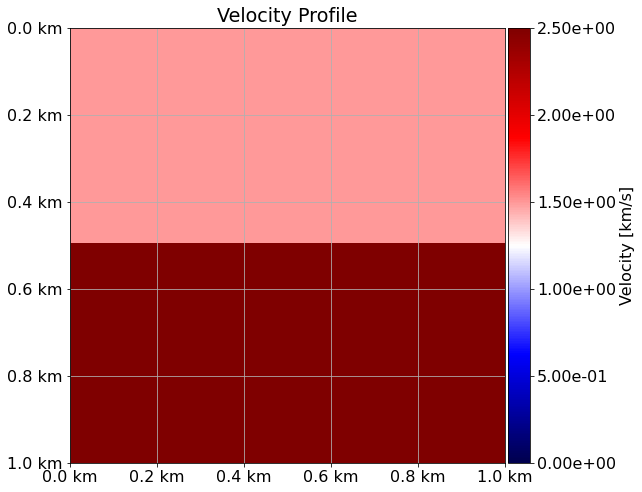

In [9]:
# NBVAL_IGNORE_OUTPUT

graph2dvel(v0)

To build the *temporal grid* we use the command *TimeAxis*. Before using  *TimeAxis*, we need to set the following parameters:

- *t0* is the initial time simulation in milliseconds (ms);
- *tn* is the final time simulation in milliseconds (ms);
- *CFL* is the numerical value that imposes a restriction on the size of the time step, in order to obtain stability of the method;
- *vmax* denotes the maximum velocity propagation. This value is obtained by analyzing the maximum value of the *vel* array;
- *dtmax* is the upper limit for $\Delta t$. This value is constructed from the *hx*, *hy* and *vmax* values.
- *ntmax* is the number of time steps required to reach time $t_ {F}$;
- dt0 is the value of$\Delta t$ that can be used in the numerical method and that guarantees its stability;

The parameters mentioned above are given by:

In [10]:
t0    = 0.
tn    = 1000.   
CFL   = 0.4
vmax  = np.amax(v0) 
dtmax = np.float64((min(hx,hz)*CFL)/(vmax))
ntmax = int((tn-t0)/dtmax)+1
dt0   = np.float64((tn-t0)/ntmax)

To generate the *temporal grid* we use the variables given above and allocate them to some local variables of the *TimeAxis* function:

- The start time *t0* is assigned to the local variable *start*;
- The final time *tn* is assigned to the local variable *stop*;
- The local variable *num* corresponds to the total number of steps in time,*ntmax*, plus 1, where this increase represents the initial time step.

We can then generate the *time_range* as follows:

In [11]:
# NBVAL_IGNORE_OUTPUT

time_range = TimeAxis(start=t0,stop=tn,num=ntmax+1)
nt         = time_range.num - 1

Once we have defined the spatial and temporal structures, we need to know the symbolic values that are associated with these grids:

- *hxs* and *hzs* represent the symbolic values of the *hx* and *hz* parameters, respectively;
- *x* and *z* represent the symbolic values of the variables $x$ and $z$. We emphasize that in Devito we do not have the explicit values of $x$ and $z$, but their position in the spatial grid, that is, *x* and *z* are integer values and mark positions in the $x*hx$ grid and $z*hz$;
- *t* is the symbolic representation of the temporal dimension, similar to that represented by the variables *x* and *z* in the spatial dimension. *t* is also an integer position and represents $t*dt$;
- *dt* is the symbolic representation of $\Delta t$ time step;

These symbolic values are defined with the following commands:

In [12]:
(hxs,hzs) = grid.spacing_map  
(x, z)    = grid.dimensions     
t         = grid.stepping_dim
dt        = grid.stepping_dim.spacing

To generate the Ricker source, we set the parameters:

- *f0*, the source frequency in $Khz$;
- *nsource* is the number of sources we want to include in the simulation;
- *xposf* is the position in meters of the source in the direction $x$. This position can be defined by a point value (when choosing 1 source) or a vector of positions (when choosing more than 1 source);
- *zposf* is the position in meters of the source in the $z$ direction. This position can be defined by a point value (when choosing 1 source) or a vector of positions (when choosing more than 1 source);

**Observation 1:** *xposf* and *zposf* are associated as follows: these generate the ordered pairs where the sources are positioned, that is, when we define these variables we are defining the positioning of the source(s).

**Observation 2:** The Ricker source will be used to compose the external force term $f(x, z, t)$ that appears in the acoustic equation.

We choose a single source, with frequency of $0.005Khz$, positioned at $\bar{x}$ = 500m and $\bar{z}$ = 10m.

In [13]:
f0      = 0.01
nsource = 1
xposf   = 0.5*compx
zposf   = hz

Ricker's source is generated by the class *RickerSource* whose local variables are:

- *name* is the symbolic name of the source;
- *grid* is the grid where the font will be placed;
- *f0* is the frequency of the source;
- *npoint* is the number of fonts that will be placed;
- *time_range* is the structure that contains the time informations that we are using in our simulations;
- *staggered* is the type of positioning of the points;
- *src.coordinates.data[:, 0]* is the positioning of the source in the $x$ direction;
- *src.coordinates.data[:, 1]* is the positioning of the source in the $z$ direction;

We choose the following values for the local variables of the *RickerSource* command:

- *name=src;*
- *grid=grid;*
- *f0=f0;*
- *npoint=nsource*;
- *time_range=time_range;*
- *staggered=NODE;* We use the NODE option which is for grid points of type *non-staggered *;
- *src.coordinates.data [:, 0]=xposf;*
- *src.coordinates.data [:, 1]= zposf;*

With the above definitions we generate the Ricker font as follows:

In [14]:
src = RickerSource(name='src',grid=grid,f0=f0,npoint=nsource,time_range=time_range,staggered=NODE,dtype=np.float64)
src.coordinates.data[:, 0] = xposf
src.coordinates.data[:, 1] = zposf

In order to set the receivers we need to define:

- *nrec*, the number of receivers that we want to insert in the grid;
- *nxpos*,the position in meters of receivers in the direction $x$. This position can be defined by a point value (when choosing 1 receiver) or a vector of positions (when choosing more than 1 receivers);
- *nzpos*, the position in meters of receivers in the $z$ direction. This position can be defined by a point value (when choosing 1 receiver) or a vector of positions (when choosing more than 1 receivers);

**Note:** *nxpos* and *nzpos* are associated as follows: these generate the ordered pairs where the receivers are positioned, that is, when we define these variables we are defining the positioning of the receiver(s).

Below we include the plot of Ricker source.

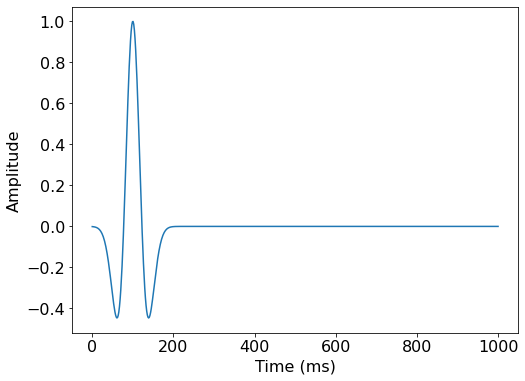

In [15]:
# NBVAL_IGNORE_OUTPUT

src.show()

In our case, we choose the number of grid points in the $x$ direction for the number of receivers, which are  positioned along the grid line in the $x$ direction at the height $\bar{z}$ = 10m. In this way our variables are chosen as:

In [16]:
nrec   = nptx
nxpos  = np.linspace(x0,x1,nrec)
nzpos  = hz

Receivers are generated by the command *Receiver* whose local variables are:

- *name* is the symbolic name of the Receiver;
- *grid* is the grid where the receivers will be placed;
- *npoint* is the number of receivers that will be placed;
- *time_range* is the structure that contains the time informations that we are using in our simulations;
- *staggered* is the type of positioning of the points;
- *rec.coordinates.data [:, 0]* is the positioning of receivers in the direction $x$;
- *rec.coordinates.data [:, 1]* is the positioning of receivers in the $z$ direction;

We employ the following values for the local variables of the *Receiver* command:

- *name=rec;*
- *grid=grid;*
- *npoint=nrec*;
- *time_range=time_range;*
- *staggered=NODE;* We use the NODE option which is for grid points of type *non-staggered*;
- *rec.coordinates.data[:, 0]=nxpos;*
- *rec.coordinates.data[:, 1]=nzpos;*

We then generate the Receivers:

In [17]:
rec = Receiver(name='rec',grid=grid,npoint=nrec,time_range=time_range,staggered=NODE,dtype=np.float64)
rec.coordinates.data[:, 0] = nxpos
rec.coordinates.data[:, 1] = nzpos

The next step is to create a variable in which we want to allocate the displacement field, which varies in space and time. It will be a field of type *TimeFunction*. The parameters needed to create a *TimeFunction* are:

- *name* is the symbolic name that is given to this field;
- *grid* is the spatial and temporal grid in which this field will be evaluated;
- *time_order* is the order of approximation of the time derivatives;
- *space_order* is the order of approximation of spatial derivatives;
- *staggered* is the type of positioning of the points (NODE means that the variables are located at the grid points);


In [18]:
u = TimeFunction(name="u",grid=grid,time_order=2,space_order=2,staggered=NODE,dtype=np.float64)

We also need to create a field for the wave propagation velocity, a field which will not change over time. Therefore it is defined as a *Function* type field. The parameters needed to create a *Function* are:

- *name* is the symbolic name that is given to this field;
- *grid* is the spatial grid on which this field will be evaluated;
- *space_order* is the order of approximation of spatial derivatives;
- *staggered* is the type of positioning of the points;

In addition, we need to associate the velocity values previously defined to the field's *.data* property, that is, we just need to do the following operation:

- *name.data[:,:]=m[:,:]*,

where *m* denotes the array with predefined values. 

In [19]:
vel0 = Function(name="vel0",grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
vel0.data[:,:] = v0[:,:]

Once we have created the Ricker source, we can then create the external force term in the acoustics equation. This insertion of the external force term in the acoustic equation takes into account the discretization of the differential equation. Therefore, it is multiplied by $\Delta^2 t$ and $c^2(x,z)$.

To insert the Ricker source we use the *src.inject*, whose local variables are:

- *field* is the field in which the source term will be injected;
- *expr* defines the expression of the source to be injected;

We set

- *field=u.forward*, where * forward * indicates that we are working with field * u * at time * t + 1 *;
- *expr=$src*dt^{2}*vel0^{2}$ *, where src represents the Ricker source that was created in a previous structure and $vel0$ denotes the velocity field of the problem;

The source term is called *src_term* and it is created as follows:

In [20]:
src_term = src.inject(field=u.forward,expr=src*dt**2*vel0**2)

To define the Receivers we use the structure called *rec.interpolate*. We need to define the expression *expr* to
be computed at the receivers location, which in this case is the value of the displacement.

In this way, the Receivers term is named *rec_term* and is created as follows:

In [21]:
rec_term = rec.interpolate(expr=u)

We now create the acoustic equation without the external force term. As defined previusly, *u* represents the displacement field and *vel0* the field that carries the velocity information. 

- The structure that creates Equations in Devito is *Eq(eq)*, where *eq* is the equation we want to assign;
- .dt2 calculates the second temporal derivative of the field it is applied to;
- .laplace builds the spatial Laplacian operator of a given field. In the present case, this operator is .dx2 + .dz2;

The acoustic equation without the source term has the following form:

- $ u_ {tt} - c ^ {2} (u_ {xx} + u_ {zz}) $

Using Devito's notation, we have

- eq = u.dt2 - vel0 * vel0 * u.laplace

Then, using the operator *Eq(eq)*  we create the *pde* that represents the acoustic equation without the source term:

In [22]:
pde = Eq(u.dt2 - u.laplace*vel0**2)

For Devito to solve a predefined *pde* we use the expression *solve(pde,field)* where the parameters are the equation we want to solve (*pde*) and the field being  updated (*field1*). In our case, we want to solve the *pde* in the *u.forward* field, so we have

- solve(pde,u.forward)

Now we need Devito to assign this solution to a field, where we use the command *Eq()* again, with a few more options: more precisely we will have *Eq(field2,eq2,subdomain)*, where *field2* is the field who will receive the solution of *eq2* computed in the given *subdomain*. Since the only subdomain we have is *d0*,we define the expression of the subdomain as:

- subdomain=grid.subdomains ['d0']

Altogether we define the *stencil* for the acoustic problem:

In [23]:
stencil  =  Eq(u.forward, solve(pde,u.forward),subdomain = grid.subdomains['d0'])

We also need to create the boundary conditions.

The *u* field is such that *u=u[t, x, y]* where *(t, x, y)* are integer positions. We know that $x\in \{0,nptx \}$ and $z\in \{0,nptz \}$. For the term $t$ the field *u* a priori stores only 3 values of *t*, since *time_order=2*. These values are:

- *u[t-1, x, z]* or *u.backward* is the solution at the instant *t-1*;
- *u[t, x, z]* or *u* is the solution at instant *t*;
- *u[t + 1, x, z]* or *u.forward* is the solution at the instant *t+1*;

We know that the first and last points of the mesh in the direction $x$ are associated with positions *0* and *nptx-1*. Similarly, the first and last point of the mesh in the $z$ direction are associated with positions *0* and *nptz-1*. Using the structure of the command *Eq(field,value)* we have that the condition of null Dirichilet can be described as:

- *Eq(u[t+1,0,y],0.);*
- *Eq(u[t+1,nptx-1,y],0.);*
- *Eq(u[t+1,x,npty-1],0.);*

The free-surface condition (using a backward discretization in the *z* direction) is given by:

- *Eq(u[t+1,x,0],u[t+1,x,1]);*

Putting all these boundary conditions together in a term named *bc* we have to:

In [24]:
bc  = [Eq(u[t+1,0,z],0.),Eq(u[t+1,nptx-1,z],0.),Eq(u[t+1,x,nptz-1],0.),Eq(u[t+1,x,0],u[t+1,x,1])]

We then define the operator (*op*) that will combine the acoustic equation with the source term, boundary conditions and receivers.

- 1. The acoustic wave equation: *[stencil];*
- 2. Source term: *src_term;*
- 3. Boundary conditions: *bc;*
- 4. Receivers: *rec_term;*
- 5. To replace any symbolic terms associated with *grid*: *subs=grid.spacing_map;*

So we define the *op* generated by the following command:

In [25]:
# NBVAL_IGNORE_OUTPUT

op  = Operator([stencil] + src_term + bc + rec_term,subs=grid.spacing_map)

Before starting we reset the field *u* in all its values.

In [26]:
u.data[:] = 0.

We assign to *op* the number of time steps it must execute, using the local variable *time*, and the size of the time step, using the local variable *dt*, so that:

- *time=nt*;
- *dt=dt0*;


In [27]:
# NBVAL_IGNORE_OUTPUT

op(time=nt,dt=dt0)

Data type float64 of runtime value `dt` does not match the Constant data type <class 'numpy.float32'>
Operator `Kernel` run in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.00603600000000006, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=4.199999999999998e-05, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=2.900000000000001e-05, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section3', rank=None),
                     PerfEntry(time=0.00024199999999999943, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section4', rank=None),
                     PerfEntry(time=0.00080700000000001, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

To view the result of the displacement field at the end time, let's create a plot routine as follows:

In [28]:
def graph2d(U):    
    plot.figure()
    plot.figure(figsize=(16,8))
    fscale =  1/10**(3)
    scale  = np.amax(U)/10.
    extent = [fscale*x0,fscale*x1,fscale*z1,fscale*z0]
    fig = plot.imshow(np.transpose(U),vmin=-scale, vmax=scale, cmap=cm.seismic, extent=extent)
    plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.axis('equal')
    plot.title('Map - Acoustic Problem with Devito')
    plot.grid()
    ax = plot.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plot.colorbar(fig, cax=cax, format='%.2e')
    cbar.set_label('Displacement [km]')
    plot.draw()
    plot.show()

To access the solution in the *u* field, we will access the *0* position in *u.data*, that is,

-*u.data [0,:,:]*

We pass this value as an argument to the function *graph2d(U)*.

<Figure size 576x432 with 0 Axes>

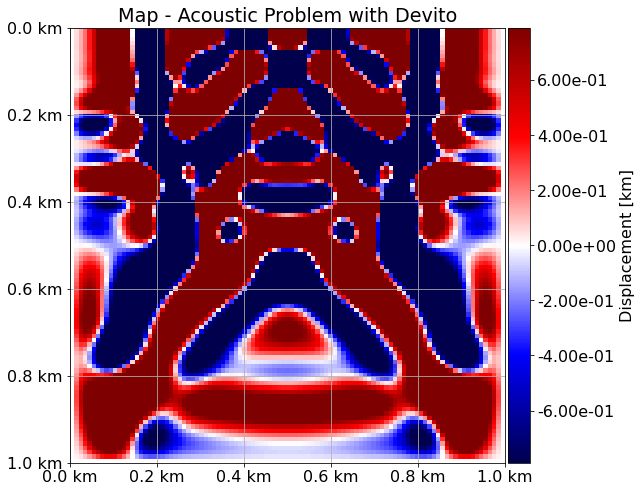

In [29]:
# NBVAL_IGNORE_OUTPUT

graph2d(u.data[0,:,:])

Realize that the solution has a large amount of noise, which is generated by the reflections at the boudaries. The main objective of this series of notebooks is to present several numerical schemes designed to reduce the wave reflections on the computational boundaries of the domain during simulation.

We now create a routine to plot the shot records of the Receivers

In [30]:
def graph2drec(rec):    
        plot.figure()
        plot.figure(figsize=(16,8))
        fscaled = 1/10**(3)
        fscalet = 1/10**(3)
        scale   = np.amax(rec)/10.
        extent  = [fscaled*x0,fscaled*x1, fscalet*tn, fscalet*t0]
        fig = plot.imshow(rec, vmin=-scale, vmax=scale, cmap=cm.seismic, extent=extent)
        plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
        plot.axis('equal')
        plot.title('Receivers Signal Profile - Devito')
        ax = plot.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plot.colorbar(fig, cax=cax, format='%.2e')
        plot.show()

To access the result of the displacement in the receivers, we access the term *rec.data* and pass this term as an argument to the function *graph2drec*.

<Figure size 576x432 with 0 Axes>

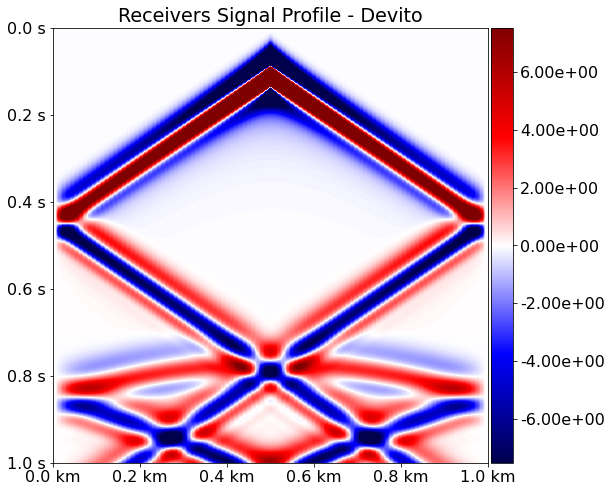

In [31]:
# NBVAL_IGNORE_OUTPUT

graph2drec(rec.data)

From this plot we can clearly see the reflections of the waves at the lateral boundaries.

In [32]:
assert np.isclose(np.linalg.norm(rec.data), 990, rtol=1)

# 1.6 - Conclusions

We conclude our introduction to the Acoustic Problem, including simulations in the Devito environment, highlighting the following items:

- The simulation time when using Devito is small, when compared to routines that use pure Python;
- Devito has a simplified language for building operators and equations, once the user acquires familiarity with the package;
- When no reflection reduction strategy is used, at the end of the simulation we observe a large amount of noise in our image;
- The constructions employed here can be used as a basis for implementing the methods with absorbing boundary conditions or absorbing boundary layers;

# 1.7 - References

- Berenger, J.-P. (1994). "A perfectly matched layer for the absorption of electromagnetic waves", Journal of Computational Physics, 114(2), 185-200. DOI: 10.1006/jcph.1994.1159. <a href="https://www.sciencedirect.com/science/article/pii/S0021999184711594">Reference Link.</a>

- Clayton, R., & Engquist, B. (1977). "Absorbing boundary conditions for acoustic and elastic wave equations", Bulletin of the seismological society of America, 67(6), 1529-1540. <a href="https://pubs.geoscienceworld.org/ssa/bssa/article/67/6/1529/117727?casa_token=4TvjJGJDLQwAAAAA:Wm-3fVLn91tdsdHv9H6Ek7tTQf0jwXVSF10zPQL61lXtYZhaifz7jsHxqTvrHPufARzZC2-lDw">Reference Link.</a>

- Engquist, B., & Majda, A. (1979). "Radiation boundary conditions for acoustic and elastic wave calculations," Communications on pure and applied mathematics, 32(3), 313-357. DOI: 10.1137/0727049. <a href="https://epubs.siam.org/doi/abs/10.1137/0727049">Reference Link.</a>

- Fichtner, A. (2010). ”Full seismic waveform modelling and inversion”, Springer Science and Business Media. <a href="https://www.springer.com/gp/book/9783642158063">Reference Link.</a>

- Grote, M. J. and Sim, I. (2010). "Efficient PML for the wave equation", arXiv preprint arXiv:1001.0319. <a href="https://arxiv.org/abs/1001.0319">Reference Link.</a>

- Higdon, R. L. (1987). "Absorbing boundary conditions for difference approximations to the multidimensional wave equation," Mathematics of computation, 47(176), 437-459. DOI: 10.1090/S0025-5718-1986-0856696-4. <a href="https://www.ams.org/journals/mcom/1986-47-176/S0025-5718-1986-0856696-4/">Reference Link.</a>

- Higdon, Robert L. "Numerical absorbing boundary conditions for the wave equation," Mathematics of computation, v. 49, n. 179, p. 65-90, 1987. DOI: 10.1090/S0025-5718-1987-0890254-1. <a href="https://www.ams.org/journals/mcom/1987-49-179/S0025-5718-1987-0890254-1/">Reference Link.</a>

- Liu, Y., & Sen, M. K. (2018). "An improved hybrid absorbing boundary condition for wave equation modeling," Journal of Geophysics and Engineering, 15(6), 2602-2613. DOI: 10.1088/1742-2140/aadd31. <a href="https://academic.oup.com/jge/article/15/6/2602/5209803">Reference Link.</a>

- Sochaki, J., Kubichek, R., George, J., Fletcher, W.R. and Smithson, S. (1987). "Absorbing boundary conditions and surface waves," Geophysics, 52(1), 60-71. DOI: 10.1190/1.1442241. <a href="https://library.seg.org/doi/abs/10.1190/1.1442241">Reference Link.</a>